# **K-Nearest Neighbors**

In this exercise, you will build a classifier using the K-Nearest Neighbors algorithm.

---

### **1. Generating data**

You will start by generating synthetic data for this problem.  

- Generate a dataset with **n = 50 points** in a unit square. Each point should have an assigned label: orange or blue.  
  - Think about the rules to assign the labels (hint: you need a boundary rule to classify points as orange or blue).  
  - Store the x and y coordinates, along with the label, in a structured format.  
  - Vizualize the dataset.

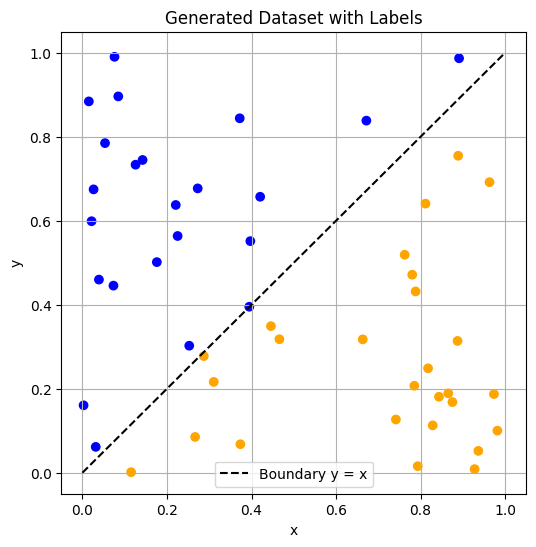

array([['0.8176965820908934', '0.24860825605280845', 'orange'],
       ['0.0848299107145638', '0.8960070443971504', 'blue'],
       ['0.27274660659493055', '0.6769955005122732', 'blue'],
       ['0.42046241922759076', '0.6570519316645455', 'blue'],
       ['0.9735655771880262', '0.1872936284470007', 'orange']],
      dtype='<U32')

In [4]:
import numpy as np
import matplotlib.pyplot as plt

n = 50
X = np.random.rand(n, 2)  
x_coords = X[:, 0]
y_coords = X[:, 1]


labels = np.where(y_coords > x_coords, "blue", "orange")

plt.figure(figsize=(6,6))
plt.scatter(x_coords, y_coords, c=labels)
plt.plot([0,1], [0,1], 'k--', label="Boundary y = x")  
plt.grid(True)
plt.title("Generated Dataset with Labels")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

data = np.column_stack((x_coords, y_coords, labels))
data[:5]  


### **2. The algorithm**

You will now use your generated dataset to determine the label of a new observation **(x₀, y₀)**. Here are the steps you should follow :

- Compute the distances between **(x₀, y₀)** and all points in your dataset.  
  - How will you calculate the distance ? 
  - What type of distance metric can you use ?  

- Select a value for **K**

- Identify the **K nearest neighbors** for your new point based on the distances you computed.  

- Based on the labels of the nearest neighbors, how would you decide the predicted class for the new observation ? Do it and explain your approach.

- Experiment with different values of **K** :  
  - Analyze how the prediction changes depending on different values for **K**.  
  - What happens when **K** is too small ? Too large ?

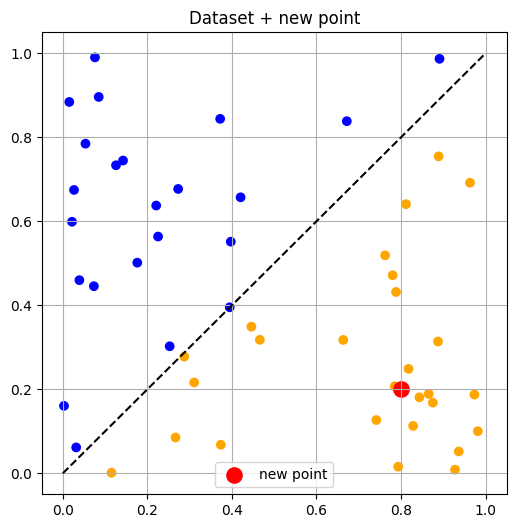

K = 1: predicted = orange, neighbors = ['orange']
K = 3: predicted = orange, neighbors = ['orange' 'orange' 'orange']
K = 5: predicted = orange, neighbors = ['orange' 'orange' 'orange' 'orange' 'orange']
K = 7: predicted = orange, neighbors = ['orange' 'orange' 'orange' 'orange' 'orange' 'orange' 'orange']
K = 9: predicted = orange, neighbors = ['orange' 'orange' 'orange' 'orange' 'orange' 'orange' 'orange' 'orange'
 'orange']


In [5]:
# NEW POINT 
x0, y0 = 0.8, 0.2
plt.figure(figsize=(6,6))
plt.scatter(x_coords, y_coords, c=labels)
plt.scatter(x0, y0, c='red', s=120, label="new point")
plt.plot([0,1], [0,1], "k--")
plt.legend()
plt.grid(True)
plt.title("Dataset + new point")
plt.show()

def compute_distances(x0, y0, X):
    return np.sqrt((X[:,0] - x0)**2 + (X[:,1] - y0)**2)

distances = compute_distances(x0, y0, X)

def knn_predict(X, labels, x0, y0, K):
    distances = compute_distances(x0, y0, X)
    idx = np.argsort(distances)       
    k_labels = labels[idx][:K]        
    
    values, counts = np.unique(k_labels, return_counts=True)
    predicted = values[np.argmax(counts)]
    
    return predicted, k_labels, distances[idx][:K]

for K in [1, 3, 5, 7, 9]:
    predicted, neigh_labels, neigh_dist = knn_predict(X, labels, x0, y0, K)
    print(f"K = {K}: predicted = {predicted}, neighbors = {neigh_labels}")

### **3. KNN for non linear patterns**

- Implement the K-Nearest Neighbors algorithm for datasets with non linear shapes (generate these data, you can use your creativity).  
  - What happens to your prediction as the dataset structure becomes more complex ?

- Test your implementation by generating a random test set with new points. Measure how well your algorithm performs (e.g., accuracy, precision, recall).  

- Try using a different distance metric (e.g., Manhattan distance) to see how it impacts classification. Which metric feels more appropriate for your specific problem ?

---



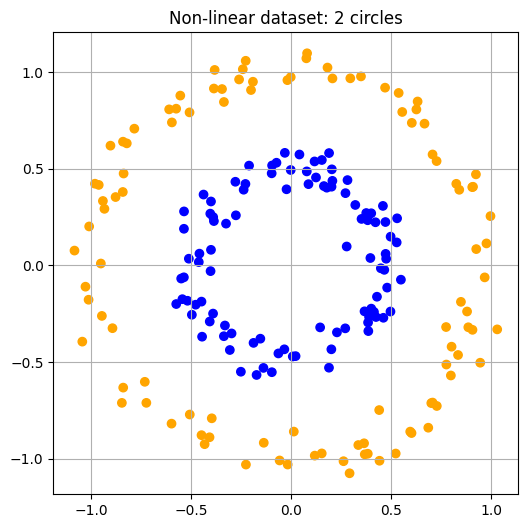

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def generate_circles(n=200, noise=0.06):
    angles = np.random.rand(n) * 2 * np.pi
    radii = np.random.choice([0.5, 1.0], size=n)
    radii = radii + np.random.randn(n)*noise

    X = np.column_stack([radii * np.cos(angles), radii * np.sin(angles)])
    labels = np.where(radii < 0.75, "blue", "orange")
    return X, labels

X, labels = generate_circles()

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("Non-linear dataset: 2 circles")
plt.grid(True)
plt.show()


In [7]:
def compute_distances_point(X, x0):
    return np.sqrt(np.sum((X - x0)**2, axis=1))

def knn_predict(X, labels, x0, K, metric="euclid"):
    if metric == "euclid":
        distances = np.sqrt(np.sum((X - x0)**2, axis=1))
    elif metric == "manhattan":
        distances = np.sum(np.abs(X - x0), axis=1)
    else:
        raise ValueError("Unknown metric")

    idx = np.argsort(distances)
    k_labels = labels[idx][:K]

    values, counts = np.unique(k_labels, return_counts=True)
    predicted = values[np.argmax(counts)]

    return predicted


In [8]:
def generate_test_set(num=100):
    Xtest = np.random.uniform(-1.5, 1.5, (num, 2))
    return Xtest

X_test = generate_test_set()


In [9]:
def true_label(x):
    r = np.sqrt(x[0]**2 + x[1]**2)
    return "blue" if r < 0.75 else "orange"

true_labels = np.array([true_label(x) for x in X_test])


In [10]:
def evaluate_knn(X, labels, X_test, true_labels, K, metric="euclid"):
    preds = []
    for x in X_test:
        preds.append(knn_predict(X, labels, x, K, metric))
    preds = np.array(preds)

    accuracy = np.mean(preds == true_labels)

    TP = np.sum((preds == "blue") & (true_labels == "blue"))
    FP = np.sum((preds == "blue") & (true_labels == "orange"))
    FN = np.sum((preds == "orange") & (true_labels == "blue"))

    precision = TP / (TP + FP + 1e-9)
    recall    = TP / (TP + FN + 1e-9)

    return accuracy, precision, recall

for K in [1, 3, 5, 7, 11]:
    acc, prec, rec = evaluate_knn(X, labels, X_test, true_labels, K)
    print(f"K={K} | accuracy={acc:.3f} precision={prec:.3f} recall={rec:.3f}")


K=1 | accuracy=0.990 precision=0.958 recall=1.000
K=3 | accuracy=1.000 precision=1.000 recall=1.000
K=5 | accuracy=1.000 precision=1.000 recall=1.000
K=7 | accuracy=1.000 precision=1.000 recall=1.000
K=11 | accuracy=1.000 precision=1.000 recall=1.000


In [11]:
for metric in ["euclid", "manhattan"]:
    acc, prec, rec = evaluate_knn(X, labels, X_test, true_labels, 5, metric)
    print(f"Metric={metric} → accuracy={acc:.3f}, precision={prec:.3f}, recall={rec:.3f}")


Metric=euclid → accuracy=1.000, precision=1.000, recall=1.000
Metric=manhattan → accuracy=1.000, precision=1.000, recall=1.000


---

# **Support Vector Machine**

A dataset contains two classes: Class A ($y=+1$ ) and Class B ($y=-1$).

You are given six labeled data points in a 2D space:

| Point $ x_i $     | Label $ y_i $  |
|-------------------|---------------|
| $ x_1 = [2, 3] $   | $ +1 $         |
| $ x_2 = [1, 2] $   | $ +1 $         |
| $ x_3 = [3, 1] $   | $ +1 $         |
| $ x_4 = [1, 0] $   | $ -1 $         |
| $ x_5 = [2, -1] $  | $ -1 $         |
| $ x_6 = [0, 0] $   | $ -1 $         |

---

### **1. Sketch & intuition**
- **1.1:** Plot the six points on a 2D graph with $ x_1 $ -$ x_2 $  axes. Do the two classes form distinct clusters ?
- **1.2:** What does it mean for the two classes to be linearly separable ? What would this imply about the complexity of the classification problem ?
- **1.3:** Are the two classes linearly separable ? If yes, arbitrarily sketch a decision boundary (no need to optimize it yet).
- **1.4:** What is the margin in the context of a decision boundary?
- **1.5:** Why would we like to maximize the margin ? What might happen if the margin is very small ? (think about new observations and future predictions)

---

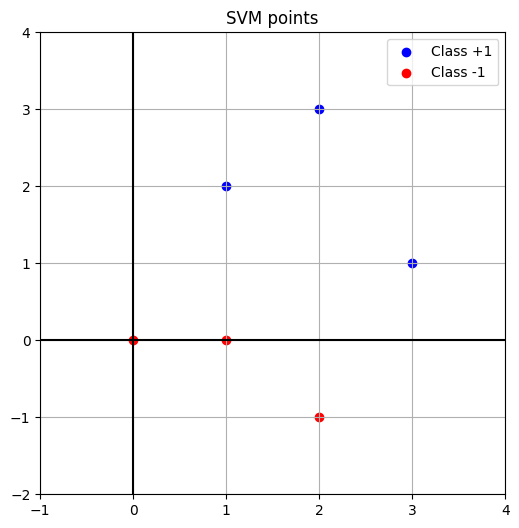

In [12]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array([
    [2, 3],
    [1, 2],
    [3, 1],
    [1, 0],
    [2, -1],
    [0, 0]
])

y = np.array([+1, +1, +1, -1, -1, -1])

plt.figure(figsize=(6,6))
plt.scatter(X[y==1][:,0], X[y==1][:,1], c='blue', label='Class +1')
plt.scatter(X[y==-1][:,0], X[y==-1][:,1], c='red', label='Class -1')

plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.grid(True)
plt.legend()
plt.title("SVM points")
plt.xlim(-1, 4)
plt.ylim(-2, 4)
plt.show()

- **1.2:**
What does it mean for two classes to be linearly separable? What does this imply about the complexity of the problem?

Two classes are linearly separable when it is possible to draw a single straight line (a linear decision boundary) such that all points of one class lie on one side of the line and all points of the other class lie on the opposite side.

If the classes are linearly separable, the classification problem becomes simpler:

A linear model (like a perceptron or hard-margin SVM) can perfectly separate the data.

No complex transformations or nonlinear kernels are needed.

- **1.3** Are the two classes linearly separable? If yes, sketch a possible decision boundary.

Yes, the two classes are linearly separable.

A valid separating line could be, for example:
- horizontal line: $$x_2 = 0.5 $$

- **1.4:** What is the margin in the context of a decision boundary?

The margin is the distance between the decision boundary and the closest data points from each class.
These closest points are known as support vectors.

A larger margin means:

The boundary is farther away from the nearest points.

The classifier is more confident in its separation.

- **1.5:** Why do we want to maximize the margin? What happens if the margin is very small?

Maximizing the margin leads to better generalization:

A larger margin makes the classifier more robust to noise and small variations in the data.

New unseen points are less likely to be misclassified if the boundary is stable and well-separated from the training data.

If the margin is very small:

The decision boundary becomes unstable.

The classifier may overfit, becoming sensitive to minor changes or noise.

Even slightly perturbed new observations could fall on the wrong side of the boundary.

Therefore, maximizing the margin helps the SVM achieve strong, reliable performance on future data.

### **2. Decision Boundary for Hard-Margin**
The decision boundary for an SVM is represented as:

$$
x^T \beta + \beta_0 = 0, \quad \text{where } \beta = [\beta_1, \beta_2]^T \text{are some weights}, \text{ and } \beta_0 \text{ is the intercept.}
$$

- **2.1:** Write down the margin constraints:

$$
y_i (\beta^T x_i + \beta_0) \geq 1
$$

For each observation ($ x_1, x_2, ..., x_6 $ ), substitute $x_i$  and $y_i$  into the inequality.

- **2.2** What does the margin constraint enforce for a correctly classified point ? Explain what this constraint means for points with $y_i=+1$ and $y_i=−1$.

- **2.3** Lets say our solver choose random initial values to specify a decision boundary:
    - $\beta = [1, -1]^T$ 
    - $\beta_0 = 0$

Verify step by step, whether the margin constraint is satisfied for each observation ($x_1, x_2, \ldots, x_6$ ) given their respective labels ($y_1, y_2, \ldots, y_6$ ). Sketch the decision line.

- **2.4** At the second iteration, our solver updates the parameters : $\beta = [2, 2]^T$ & $\beta_0 = -4$. Check again the conditions for each observations and draw the line. Does the margin look to be maximized here ? Compute its lenght :  $$M = \frac{1}{||\beta||}$$,
where $ ||\beta|| = \sqrt{\beta_1^2 + \beta_2^2} $ .



- **2.5: Using sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), write a code to find the decision line that maximize the margin. What are the estimated parameters ? Plot the line.**
    (Hint : use the linear kernel parameter)



- **2.1:**
$$
1. +1( \beta_1 * 2 + \beta_2 * 3 + \beta_0) \geq 1
$$
$$
2. +1( \beta_1 * 1 + \beta_2 * 2 + \beta_0) \geq 1
$$
$$
3. +1( \beta_1 * 3 + \beta_2 * 1 + \beta_0) \geq 1
$$
$$
4. +1( \beta_1 * 1 + \beta_2 * 0 + \beta_0) \geq 1
$$
$$
5. +1( \beta_1 * 2 + \beta_2 * (-1) + \beta_0) \geq 1
$$
$$
6. +1( \beta_1 * 0 + \beta_2 * 0 + \beta_0) \geq 1
$$

- **2.2** Interpretation of the Margin Constraint

The constraint
$$
y_i (\beta^T x_i + \beta_0) \geq 1
$$
ensures that each point lies on the correct side of the decision boundary with at least a distance of 1 from it.
- if $y_i = \pm 1 $ , then 
$$
y_i (\beta^T x_i + \beta_0) \geq 1
$$
meaning the point must lie on or beyond the positive margin boundary.
- if $y_i = -1$ , then
$$
y_i (\beta^T x_i + \beta_0) \leq -1
$$
meaning the point must lie on or beyond the negative margin boundary.

- **2.3**
- x1 = [2,3] , f = -1 -> violates constraint
- x2 = [1,2] , f = -1 -> violates constraint
- x3 = [3,1] , f = 2 -> satisfies
- x4 = [1,0] , f = 1 -> violates constraint
- x5 = [2,-1] , f = 3 -> violates constraint
- x6 = [0,0] , f = 0 -> violates constraint

- **2.4**
All six points satisfy the constraint:
- positive class: all $f(x_i) \geq 1$
- negative class: all $f(x_i) \leq -1$

The margin lenght is:
$M = \frac{1}{||\beta||}= \frac{1}{\sqrt{2^2 + 2^2}} = \frac{1}{2 * \sqrt{2}} \approx 0.3536        $

beta: [0.49984 0.99968]
beta0: -1.4994133333333337


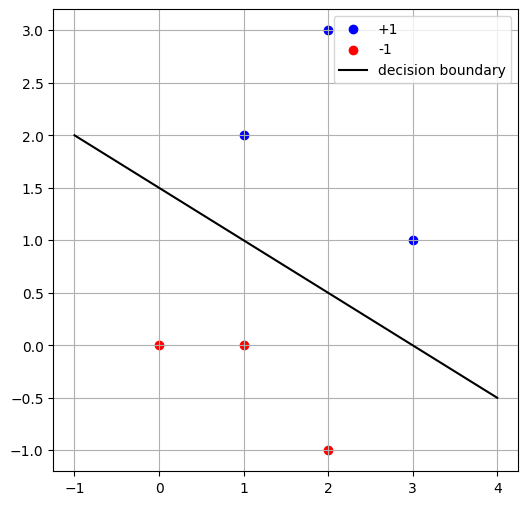

In [13]:
#2.5
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

X = np.array([
    [2, 3],
    [1, 2],
    [3, 1],
    [1, 0],
    [2, -1],
    [0, 0]
])
y = np.array([+1, +1, +1, -1, -1, -1])


clf = SVC(kernel='linear', C=1e6)
clf.fit(X, y)

beta = clf.coef_[0]
beta0 = clf.intercept_[0]

print("beta:", beta)
print("beta0:", beta0)


plt.figure(figsize=(6,6))
plt.scatter(X[y==1][:,0], X[y==1][:,1], c='blue', label='+1')
plt.scatter(X[y==-1][:,0], X[y==-1][:,1], c='red', label='-1')

x_vals = np.linspace(-1, 4, 200)
y_vals = -(beta[0]*x_vals + beta0) / beta[1]

plt.plot(x_vals, y_vals, 'k-', label='decision boundary')

plt.grid(True)
plt.legend()
plt.show()



---

### **3. Slack Variables for a Soft-Margin**
In real-world datasets, perfect separation might not be possible as the data might be mixed. 

Lets add two new observations : 
- $ x_7 = [1, 3] $  with $y_7 = +1 $
- $ x_8 = [3, -2] $  with $y_8 = -1 $


Slack variables ($ \xi_i $ ) can be added to relax the SVM constraint for incorrectly classified or margin-violating points:

$$

y_i (\beta^T x_i + \beta_0) \geq 1 - \xi_i, \quad \xi_i \geq 0

$$


They are computed by the Hinge Loss function:

$$
\xi_i = \max(0, 1 - y_i (\beta^T x_i + \beta_0))
$$

- **3.1: Check for each observation if the point violates the soft-margin constraint. Compute the slack variable $ \xi_i $  for each point.**


- **3.2: What is the slack variable when the observation is well classified ?**

- **3.3: Identify the points that violate the margin.**

- **3.3: Compute the total violation:**

$$

\text{Total Slack:} \quad \sum_{i=1}^n \xi_i.

$$

---

- 3.1
Original points:

1.x1 = [2, 3], y = +1
f = 6
1 - y*f = 1 - 6 = -5
slack = 0

2.x2 = [1, 2], y = +1
f = 2
1 - 2 = -1
slack = 0

3.x3 = [3, 1], y = +1
f = 4
1 - 4 = -3
slack = 0

4.x4 = [1, 0], y = -1
f = -2
1 - ( -1 * -2 ) = 1 - 2 = -1
slack = 0

5.x5 = [2, -1], y = -1
f = -2
1 - ( -1 * -2 ) = 1 - 2 = -1
slack = 0

6.x6 = [0, 0], y = -1
f = -4
1 - ( -1 * -4 ) = 1 - 4 = -3
slack = 0

New points:

7.x7 = [1, 3], y = +1
f = 4
1 - 4 = -3
slack = 0

8.x8 = [3, -2], y = -1
f = 0
1 - ( -1 * 0 ) = 1
slack = 1

Total slack = 1

- 3.2
If point satisfies:
yi * f(xi) >= 1
Then:
1 - yi*f(xi) <= 0
slack_i = 0
So well classified points have zero slack

- 3.3
Only one point violates the soft-margin condition:

x8 = [3, -2] with y = -1
slack = 1

All other points have slack = 0.

- 3.4
Total Slack = 0 + 0 + 0 + 0 + 0 + 0 + 0 + 1 = 1

### **4. Adding Slack Variables to the Objective Function**

The objective function that we used for the hard margin can be modified to include the penalty term for the slack variables. By doing so, our final problem is :

$$
 \text{minimize} \quad \frac{1}{2} \|\beta\|^2 + C \sum_{i=1}^{n} \xi_i 
$$

subject to :

$$
 y_i (\beta \cdot x_i + b) \geq 1 - \xi_i \quad \forall i 
$$



$$
 \xi_i \geq 0 \quad \forall i 
$$

Where, 

1. $ \frac{1}{2} \|\beta\|^2 $ encourages a large margin by minimizing the norm of the weight vector.
2. $C \sum_{i=1}^{n} \xi_i$ penalizes the slack variables. $C$  is a regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error.
3. $ y_i (\beta \cdot x_i + b) \geq 1 - \xi_i $ : This constraint allows for some points to be within the margin or misclassified, thanks to the slack variable.
4. $ \xi_i \geq 0 $ : Ensures that slack variables are non-negative.

By adding slack variables to the objective function, the soft margin SVM can handle non-separable data more effectively, balancing the need for a large margin with the practical reality of misclassifications.

- **4. How does increasing or decreasing C affect the trade-off between maximizing the margin and minimizing classification errors ?**


In the hard-margin SVM, we required all points to satisfy the margin constraint exactly.
However, in real-world data this is rarely possible, because some points may be noisy or not linearly separable.

To handle this situation, soft-margin SVM introduces slack variables (xi), which measure how much each point violates the margin.

The soft-margin objective function becomes:

Minimize:
(1/2) * ||beta||^2 + C * sum of all slack_i

Subject to:
yi * (beta • xi + beta0) >= 1 - slack_i
slack_i >= 0

Explanation of each term:

- 1
(1/2) * ||beta||^2
Encourages a large margin by making the weight vector small in norm.

- 2
C * sum(slack_i)
Penalizes violations of the margin.
C is a regularization parameter that controls the trade-off between margin size and classification errors.

- 3
yi * (beta • xi + beta0) >= 1 - slack_i
Allows points to be inside the margin or even misclassified if slack_i > 0.

- 4
slack_i >= 0
Slack variables cannot be negative.


By adding slack variables to the optimization problem, the soft-margin SVM can deal with non-separable data and real-world noise, while still trying to keep a reasonably large margin.

How does increasing or decreasing C affect the trade-off between maximizing the margin and minimizing classification errors?

If C is very large:
- The model strongly penalizes classification errors.

- SVM will try to classify every point correctly.

- Margin becomes smaller.

- Risk of overfitting increases.

If C is very small:

- The penalty for violations is weak.

- SVM allows more points to be inside the margin or even misclassified.

- Margin becomes wider.

- Risk of underfitting increases.

In summary:

- Large C = focus on minimizing errors, smaller margin, more rigid boundary.

- Small C = focus on maximizing margin, more tolerance for errors, more flexible boundary.